<a href="https://colab.research.google.com/github/aemiralfath/BPML-Dicoding/blob/master/submission2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import time
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
! pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir /root/.kaggle/
! cp "/content/drive/My Drive/Machine Learning/kaggle.json" /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=7547ff7780f9fef593dcdc73e845fb89813148d907d9828030e619c963c4dfea
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [4]:
!kaggle datasets download -d taranvee/smart-home-dataset-with-weather-information

 51% 10.0M/19.4M [00:00<00:00, 20.8MB/s]
100% 19.4M/19.4M [00:00<00:00, 46.0MB/s]


In [5]:
zipref = zipfile.ZipFile('smart-home-dataset-with-weather-information.zip', 'r')
zipref.extractall()
zipref.close()

In [6]:
df = pd.read_csv('HomeC.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [7]:
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.00095,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.00100,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.00095,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.00095,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[:-1]
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [9]:
df.columns = [col.replace(' [kW]', '') for col in df.columns]
df.tail()

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [10]:
df_clean = df[['time', 'temperature']]
df_clean.tail()

,time,temperature
503905,1452128305,35.12
503906,1452128306,35.12
503907,1452128307,35.12
503908,1452128308,35.12
503909,1452128309,35.12


In [11]:
df_clean.isnull().sum()

time           0
temperature    0
dtype: int64

In [12]:
df_clean.describe()

,temperature
count,503910.000000
mean,50.741935
std,19.113807
min,-12.640000
25%,35.770000
50%,50.320000
75%,66.260000
max,93.720000


In [13]:
min = df_clean['temperature'].min()
max = df_clean['temperature'].max()
scale = max-min
boundary = scale*0.1
print(min)
print(max)
print(scale)
print(boundary)

-12.64
93.72
106.36
10.636000000000001


In [14]:
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df_clean['time'].iloc[0]))))

2016-01-01 05:00:00


In [15]:
time_index = pd.date_range('2016-01-01 05:00:00', periods=len(df_clean), freq='min')
time_index = pd.DatetimeIndex(time_index)
df_clean = df_clean.set_index(time_index)
df_clean.tail()

,time,temperature
2016-12-16 03:25:00,1452128305,35.12
2016-12-16 03:26:00,1452128306,35.12
2016-12-16 03:27:00,1452128307,35.12
2016-12-16 03:28:00,1452128308,35.12
2016-12-16 03:29:00,1452128309,35.12


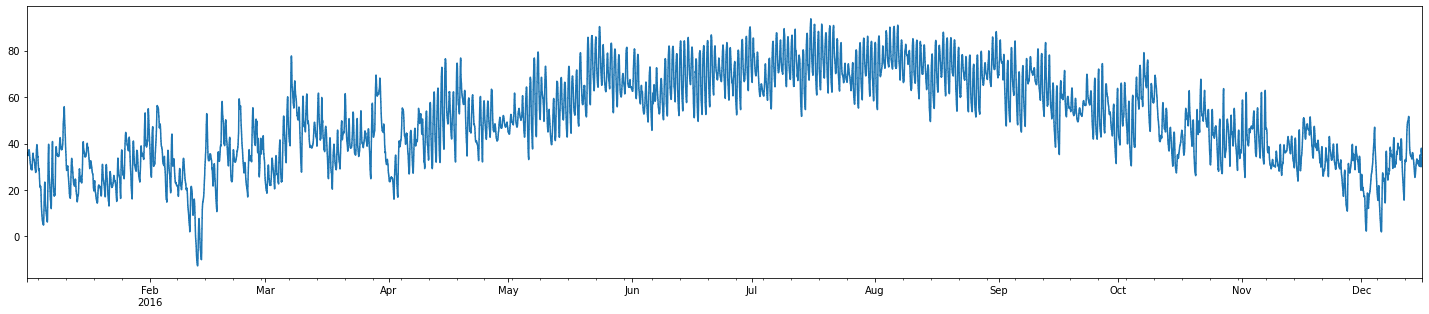

In [16]:
%matplotlib inline

df_clean['temperature'].plot(figsize=(25,5))

In [17]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [18]:
dates = df_clean.index.values
temp = df_clean['temperature'].values

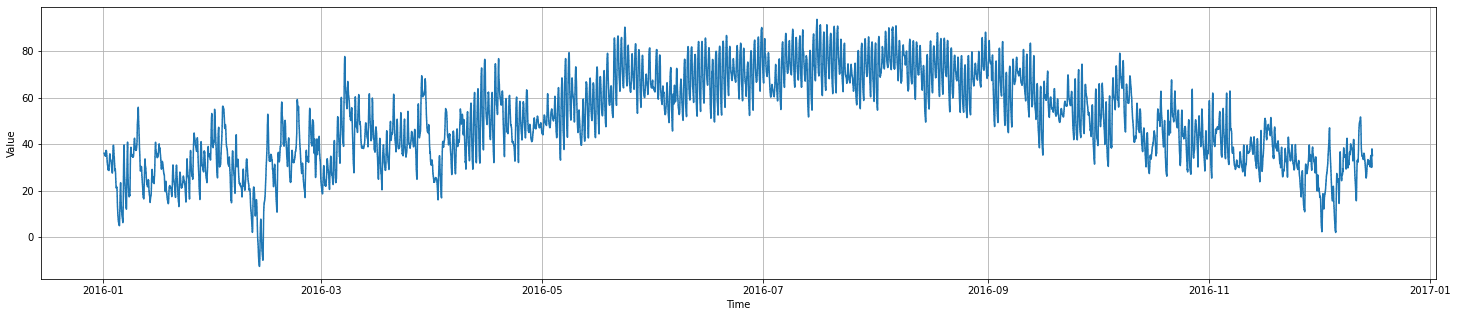

In [20]:
plt.figure(figsize=(25, 5))
plot_series(dates, temp)
plt.show()

In [21]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [27]:
total_size = len(df_clean)
train_length = total_size-int(total_size*0.2)
test_length = total_size-train_length
print(total_size)
print(train_length)
print(test_length)

503910
403128
100782


In [30]:
train_temp = windowed_dataset(temp[:train_length], window_size=60, batch_size=256, shuffle_buffer=1000)
test_temp = windowed_dataset(temp[train_length:], window_size=60, batch_size=256, shuffle_buffer=1000)

In [65]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5, strides=1, padding="causal", activation='relu', input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

lr=1e-3
epochs=10
optimizer = tf.keras.optimizers.Adam(lr=lr)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [66]:
earlyStoping = EarlyStopping(monitor='val_loss',patience=3)

lr_schedule = LearningRateScheduler(
    lambda epoch: lr*10**(epoch)
)

In [67]:
history = model.fit(
    train_temp,
    epochs=epochs,
    validation_data=test_temp,
    callbacks=[earlyStoping]  # earlyStoping, lr_schedule
)

Epoch 1/10
1575/1575 [==============================] - 78s 50ms/step - loss: 0.9549 - mae: 1.2446 - val_loss: 0.0605 - val_mae: 0.1946
Epoch 2/10
1575/1575 [==============================] - 80s 51ms/step - loss: 0.1676 - mae: 0.3440 - val_loss: 0.0299 - val_mae: 0.1598
Epoch 3/10
1575/1575 [==============================] - 79s 50ms/step - loss: 0.1221 - mae: 0.2782 - val_loss: 0.0179 - val_mae: 0.0990
Epoch 4/10
1575/1575 [==============================] - 78s 49ms/step - loss: 0.0998 - mae: 0.2418 - val_loss: 0.0159 - val_mae: 0.0768
Epoch 5/10
1575/1575 [==============================] - 79s 50ms/step - loss: 0.0549 - mae: 0.1826 - val_loss: 0.0137 - val_mae: 0.0783
Epoch 6/10
1575/1575 [==============================] - 79s 50ms/step - loss: 0.0552 - mae: 0.1726 - val_loss: 0.0108 - val_mae: 0.0577
Epoch 7/10
1575/1575 [==============================] - 75s 47ms/step - loss: 0.0493 - mae: 0.1575 - val_loss: 0.0071 - val_mae: 0.0456
Epoch 8/10
1575/1575 [==========================

In [68]:
def plot_graphs(history, string, start=None):
    label_plot = history.history[string]
    epochs_plot = range(len(label_plot))
    if start is not None:
        label_plot = label_plot[start:]
        epochs_plot = epochs_plot[start:]

    plt.plot(epochs_plot, label_plot)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

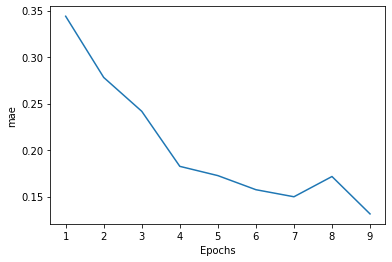

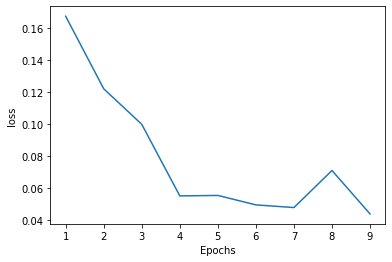

In [70]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([lr, 1e+1, 0, 30])
# plt.show()

plot_graphs(history, 'mae', 1)
plot_graphs(history, 'loss', 1)

In [71]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w:w.batch(window_size))
  ds = ds.batch(128).prefetch(1)
  return model.predict(ds)

In [72]:
forecast = np.array(model_forecast(model, temp[..., np.newaxis], 60))
forecast_test = forecast[train_length-60:-1, -1, 0]

In [73]:
print(tf.keras.metrics.mean_absolute_error(temp[train_length:], forecast_test).numpy())
print(tf.keras.metrics.mean_squared_error(temp[train_length:], forecast_test).numpy())

0.1193752
0.0809895


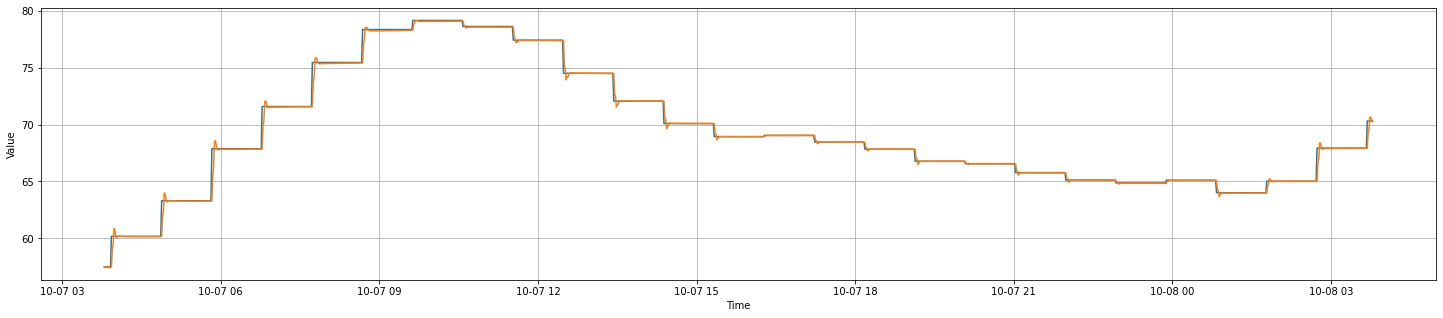

In [79]:
plt.figure(figsize=(25, 5))
plot_series(dates[train_length:train_length+1440], temp[train_length:train_length+1440])
plot_series(dates[train_length:train_length+1440], forecast_test[:1440])
plt.show()